<a href="https://colab.research.google.com/github/mahal7446/Kisan_Sathi/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os

os.listdir("/content/drive/MyDrive")

['Colab Notebooks',
 'Getting started.pdf',
 'Untitled spreadsheet (2).gsheet',
 'Untitled spreadsheet (1).gsheet',
 'Resume.gdoc',
 'Untitled spreadsheet.gsheet',
 'Google Earth',
 'Google AI Studio (1)',
 'Google AI Studio',
 'impquestions end term.gdoc',
 'DSA for PLACEMENTS.xlsx',
 'Quantitative analysis .gdoc',
 'MyXvBcppsW2FkNYCX_ifobHAoMjQs9s6bKS_68af14bacc98b1c3f8b892a4_1756320007401_completion_certificate_copy.pdf',
 'Internship 6.0 social media post template.pptx',
 'Copy of AgriDetect AI: Web-Based Plant Disease Identification System.docx',
 'Rice and Pulses',
 'Rice and Pulses.zip',
 'Corn_1k.zip',
 'BlackGram_1k.zip',
 'Mental Health Check-in Form.gform',
 'Kisan_Sathi',
 'Kisan_Sathi_Model.h5',
 'Kisan_Sathi_Model.keras',
 'Kisan_Sathi_Split',
 'Milestone-1 Documentation..pdf',
 'Blackgram_Corn_Model.h5']

In [9]:
import os

os.listdir("/content/drive/MyDrive/Kisan_Sathi_Split")

['train', 'val', 'test']

In [10]:
train_dir = "/content/drive/MyDrive/Kisan_Sathi_Split/train"
val_dir   = "/content/drive/MyDrive/Kisan_Sathi_Split/val"

import os
print("Train classes:", os.listdir(train_dir))
print("Val classes:", os.listdir(val_dir))

Train classes: ['Corn', 'BlackGram']
Val classes: ['Corn', 'BlackGram']


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [12]:
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [13]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1403 images belonging to 2 classes.
Found 299 images belonging to 2 classes.


In [14]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
for layer in base_model.layers:
    layer.trainable = False


In [16]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [17]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [18]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 665s 15s/step - accuracy: 0.6011 - loss: 0.6756 - val_accuracy: 0.9799 - val_loss: 0.1100
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9890 - loss: 0.0930 - val_accuracy: 0.9900 - val_loss: 0.0480
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9965 - loss: 0.0451 - val_accuracy: 0.9967 - val_loss: 0.0293
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9955 - loss: 0.0319 - val_accuracy: 1.0000 - val_loss: 0.0190
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9974 - loss: 0.0187 - val_accuracy: 1.0000 - val_loss: 0.0145
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.9958 - loss: 0.0170 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9987 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9993 - loss: 0.0094 - val_accuracy: 1.0000 - val_los

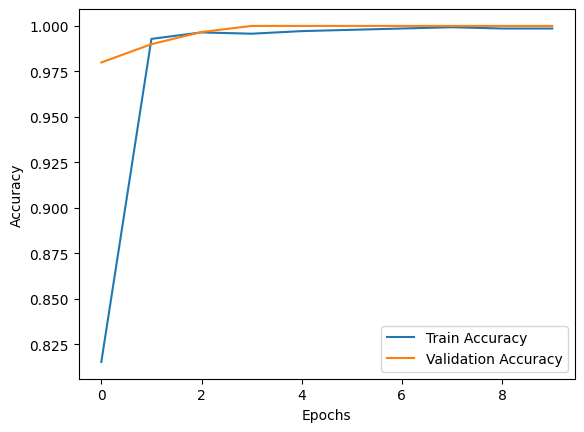

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [20]:
model.save("/content/drive/MyDrive/Blackgram_Corn_Model.h5")


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)


In [22]:
img_size = 224
batch_size = 32

In [23]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)


In [25]:
img_size = 224
batch_size = 32


In [26]:
test_dir = "/content/drive/MyDrive/Kisan_Sathi_Split/test"

test_data = val_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 305 images belonging to 2 classes.


In [28]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/Blackgram_Corn_Model.h5")


In [29]:
import numpy as np

y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)


10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


In [30]:
from sklearn.metrics import classification_report

y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))


              precision    recall  f1-score   support

   BlackGram       1.00      1.00      1.00       153
        Corn       1.00      1.00      1.00       152

    accuracy                           1.00       305
   macro avg       1.00      1.00      1.00       305
weighted avg       1.00      1.00      1.00       305

